In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
#kharif means monsoon
#rabi is a winter season
unique_seasons = df['Season'].unique()
print(unique_seasons)

['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']


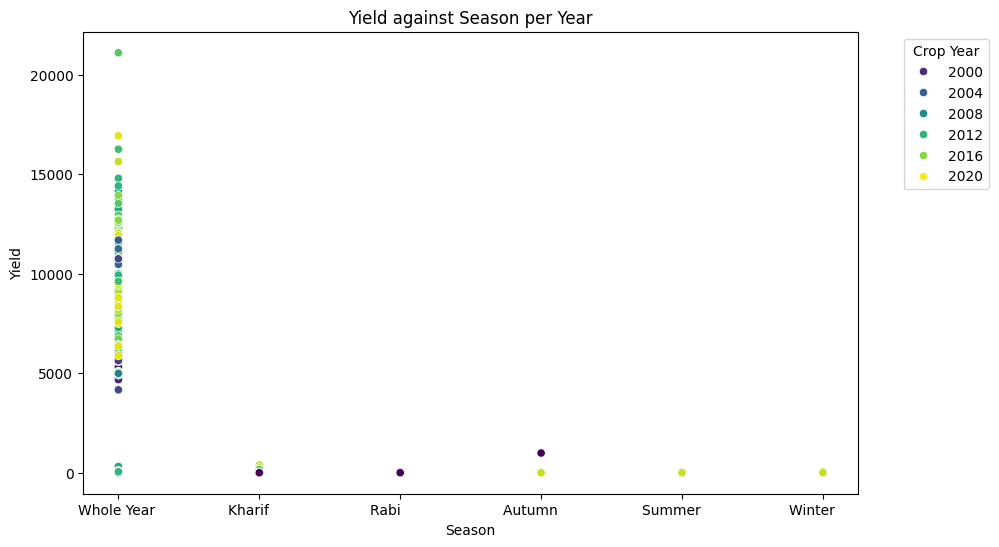

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of Yield against Season per Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Season', y='Yield', hue='Crop_Year', palette='viridis')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Yield')
plt.title('Yield against Season per Year')

# Show legend
plt.legend(title='Crop Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (19689, 10)


In [ ]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


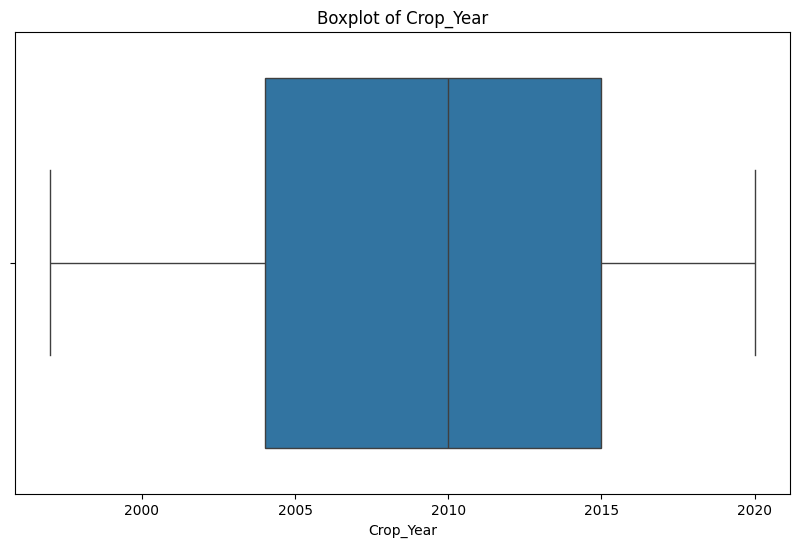

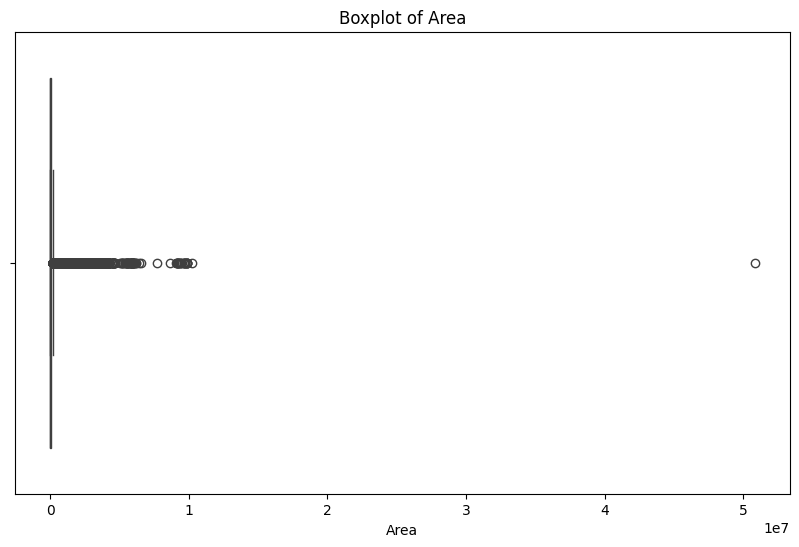

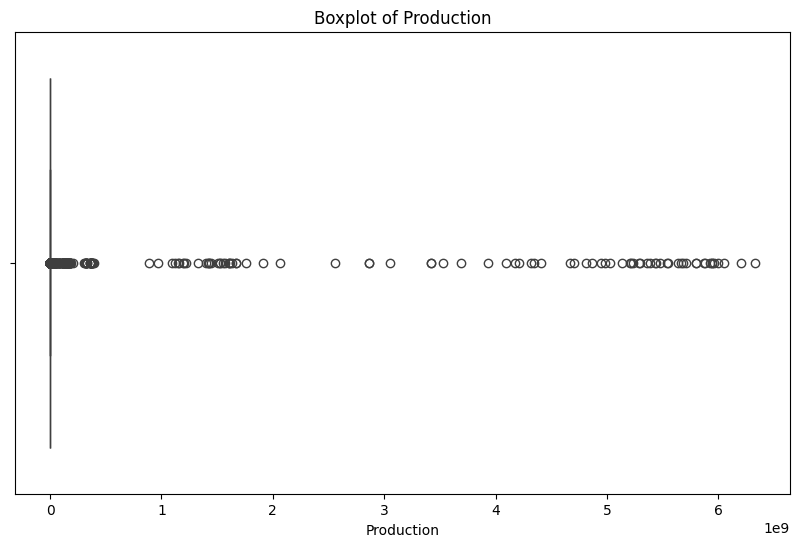

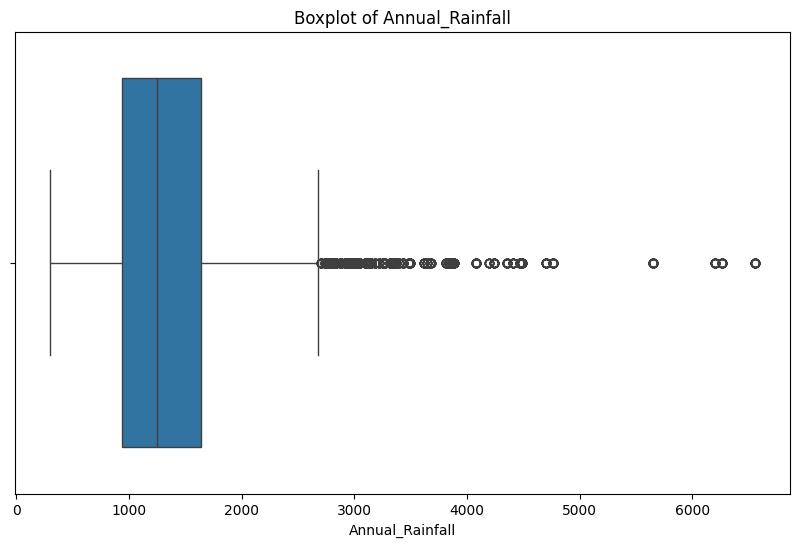

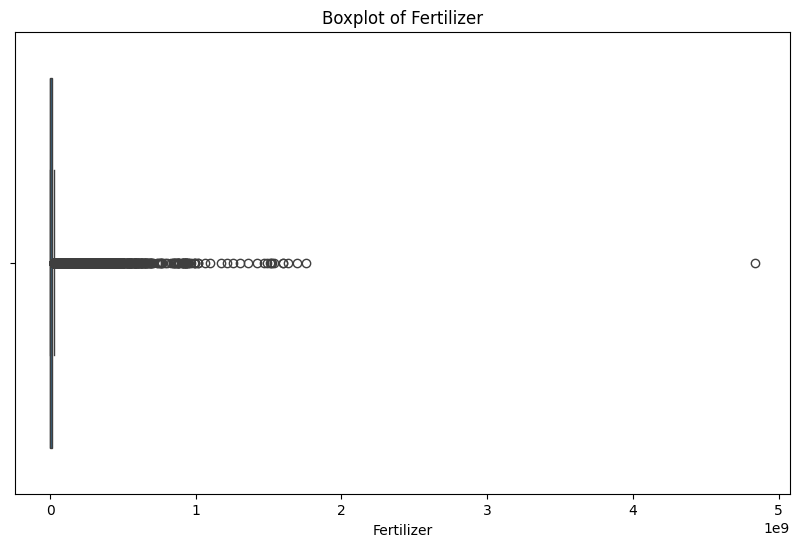

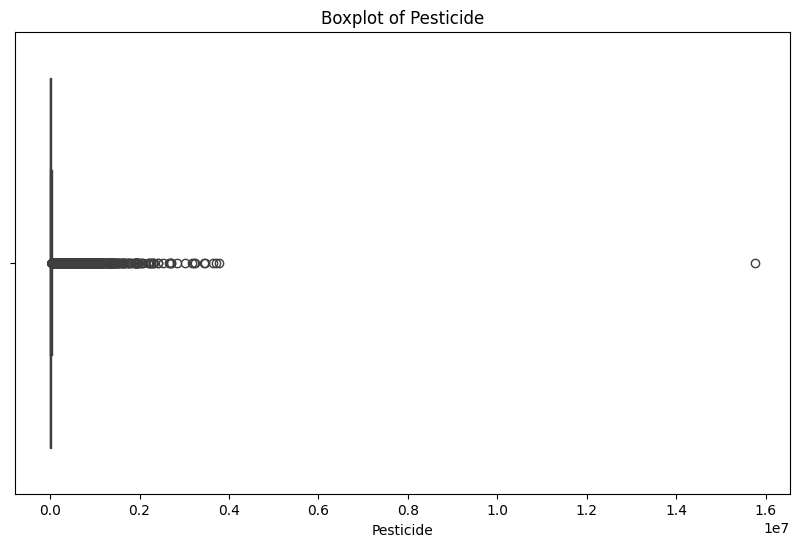

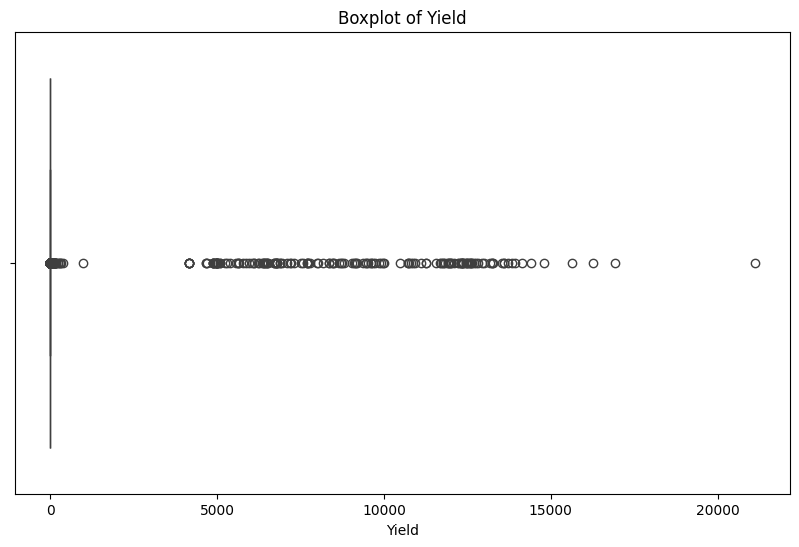

In [ ]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

# Boxplot for each variable in numerical list

for col in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#columns to scale
columns_to_scale = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

#scaling columns in place
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#This will assign numerical labels to these columns
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])

In [ ]:
#Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_columns].drop(['Yield'], axis=1)

#Target variable
y = df['Yield']

from sklearn.model_selection import train_test_split

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)

#TRAINING PREDICTION
y_train_pred = linear_reg_model.predict(x_train)

#TESTING PREDICTION
y_test_pred = linear_reg_model.predict(x_test)


train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)

Training RMSE: 0.8191279861440536
Testing RMSE: 0.7890304777748487
Training R^2 Score: 0.32247265214096266
Testing R^2 Score: 0.40063022266319226


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

#k is the number of features to select
k = 5

#feature selection
selector = SelectKBest(score_func=f_regression, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

selected_feature_indices = selector.get_support(indices=True)

selected_features = x_train.columns[selected_feature_indices]

print("Selected features:", selected_features)

linear_reg_model_selected = LinearRegression()
linear_reg_model_selected.fit(x_train_selected, y_train)

y_test_pred_selected = linear_reg_model_selected.predict(x_test_selected)

test_rmse_selected = mean_squared_error(y_test, y_test_pred_selected, squared=False)
test_r2_selected = r2_score(y_test, y_test_pred_selected)

print("Testing RMSE (with selected features):", test_rmse_selected)
print("Testing R^2 Score (with selected features):", test_r2_selected)


Selected features: Index(['Production', 'Annual_Rainfall', 'crop_encoded', 'season_encoded',
       'state_encoded'],
      dtype='object')
Testing RMSE (with selected features): 0.7891208507660852
Testing R^2 Score (with selected features): 0.40049291506048845


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_reg_model = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(ridge_reg_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge_reg_model = Ridge(alpha=best_alpha)
best_ridge_reg_model.fit(x_train, y_train)

y_test_pred = best_ridge_reg_model.predict(x_test)


test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Best alpha:", best_alpha)
print("Testing RMSE (after tuning):", test_rmse)
print("Testing R^2 Score (after tuning):", test_r2)

Best alpha: 100
Testing RMSE (after tuning): 0.7892970672230223
Testing R^2 Score (after tuning): 0.4002251365326671


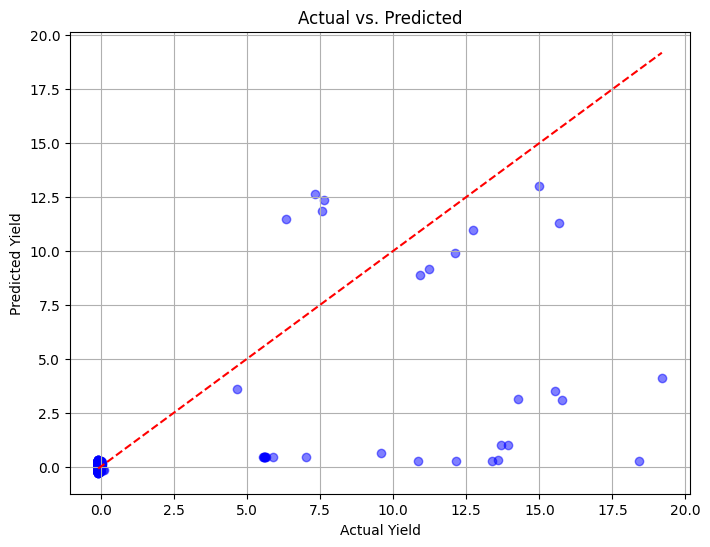

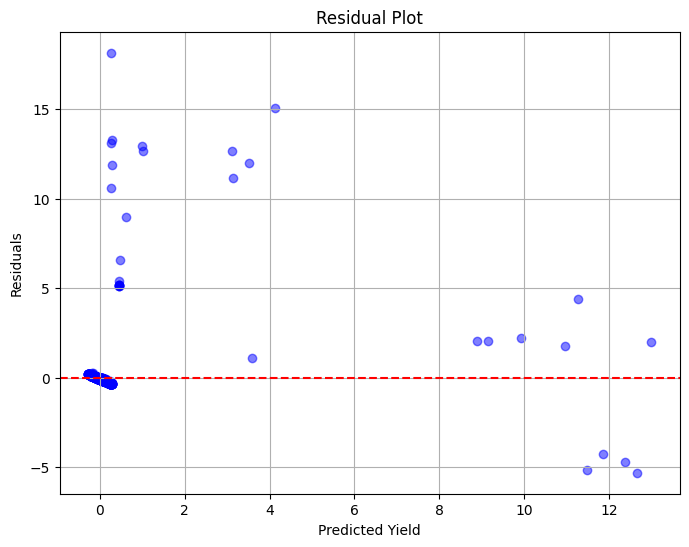

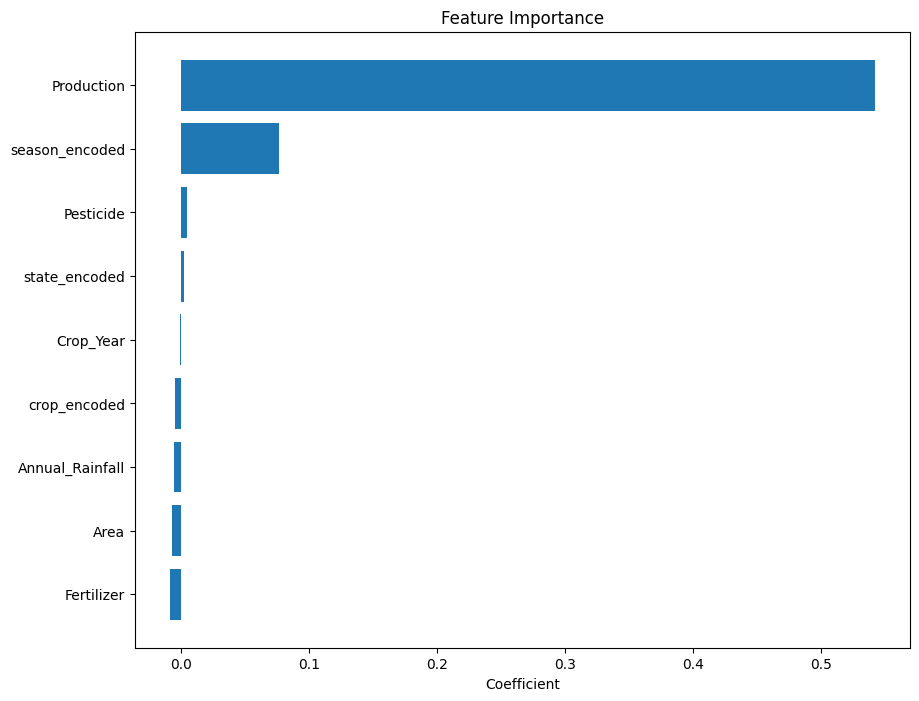

Model Performance Metrics:
----------------------------------------
| Metric         | Training Set | Testing Set |
----------------------------------------
| RMSE           | 0.819       | 0.789      |
| R^2 Score      | 0.322       | 0.400      |
----------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.grid(True)
plt.show()

#Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#Feature Importance Plot
if hasattr(best_ridge_reg_model, 'coef_'):
    feature_importance = best_ridge_reg_model.coef_
    sorted_indices = feature_importance.argsort()
    sorted_features = X.columns[sorted_indices]
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_features, feature_importance[sorted_indices])
    plt.title('Feature Importance')
    plt.xlabel('Coefficient')
    plt.show()


print("Model Performance Metrics:")
print("----------------------------------------")
print("| Metric         | Training Set | Testing Set |")
print("----------------------------------------")
print("| RMSE           | {:.3f}       | {:.3f}      |".format(train_rmse, test_rmse))
print("| R^2 Score      | {:.3f}       | {:.3f}      |".format(train_r2, test_r2))
print("----------------------------------------")
